#  Predicting Power generated from windmills 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [20]:
dataset[col[0]].equals(dtest[col[0]])

False

## Importing the dataset

In [3]:

dataset = pd.read_csv("D:/windturbins_dataset/train.csv")
dataset['datetime'].astype('datetime64[ms]')
dataset.drop(columns = ['tracking_id'], inplace = True) #We drop WTG because every value was the same

target = ['windmill_generated_power(kW/h)']


In [16]:
dtest = pd.read_csv("D:/windturbins_dataset/test.csv")

dtest['datetime'].astype('datetime64[ms]')
dtest.drop(columns = ["turbine_status","cloud_level"], inplace = True) #We drop WTG because every value was the same

target = ['windmill_generated_power(kW/h)']
for n in col[1:-1]:
        
        dataset[n].fillna(method='ffill',inplace = True)
        

In [5]:
col=['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
  'blade_length(m)',
 'blade_breadth(m)',
 'windmill_height(m)']


### Arrange the data in accending order with respect to datetime. We observe that the data is recorded for every 15 minutes, hence all columns with NaN values are replaced with there previous recordings.

In [6]:

for n in col:
        
        dataset[n].fillna(method='ffill',inplace = True)
        

In [17]:
dataset.isnull()

,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


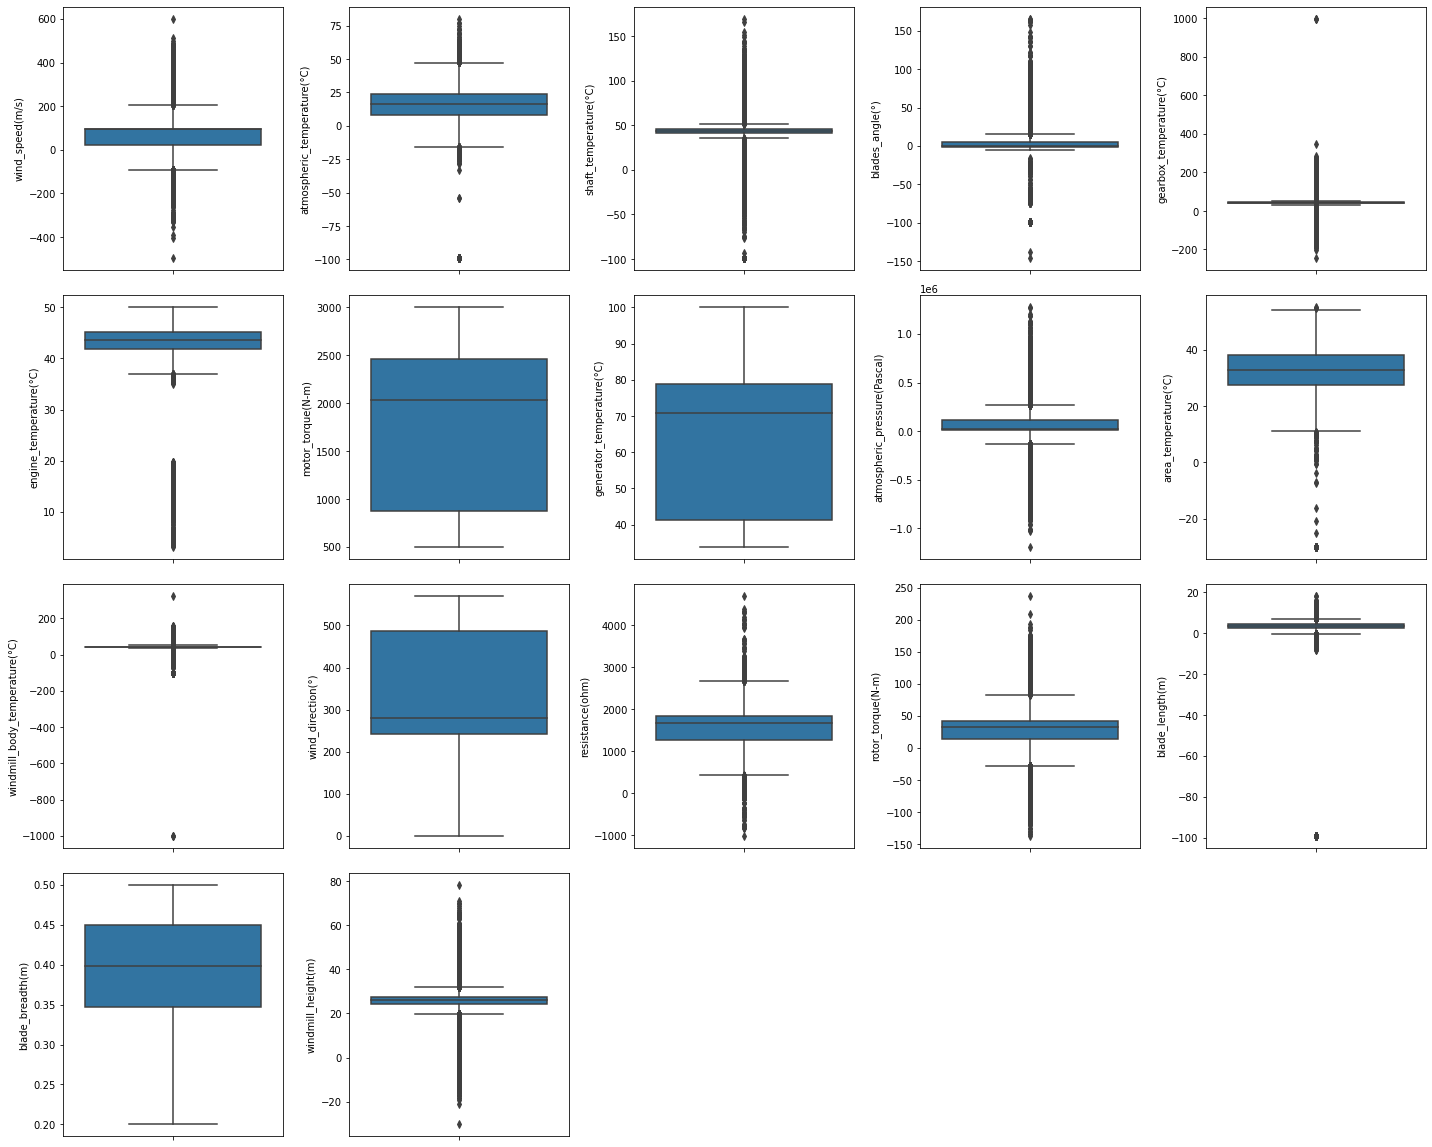

In [7]:
fig = plt.figure(figsize=(20,20))
for i,j in zip(range(len(col)),col):
    fig.add_subplot(5,5,i+1)
    sns.boxplot(y = dataset[j])
plt.tight_layout()
plt.show()

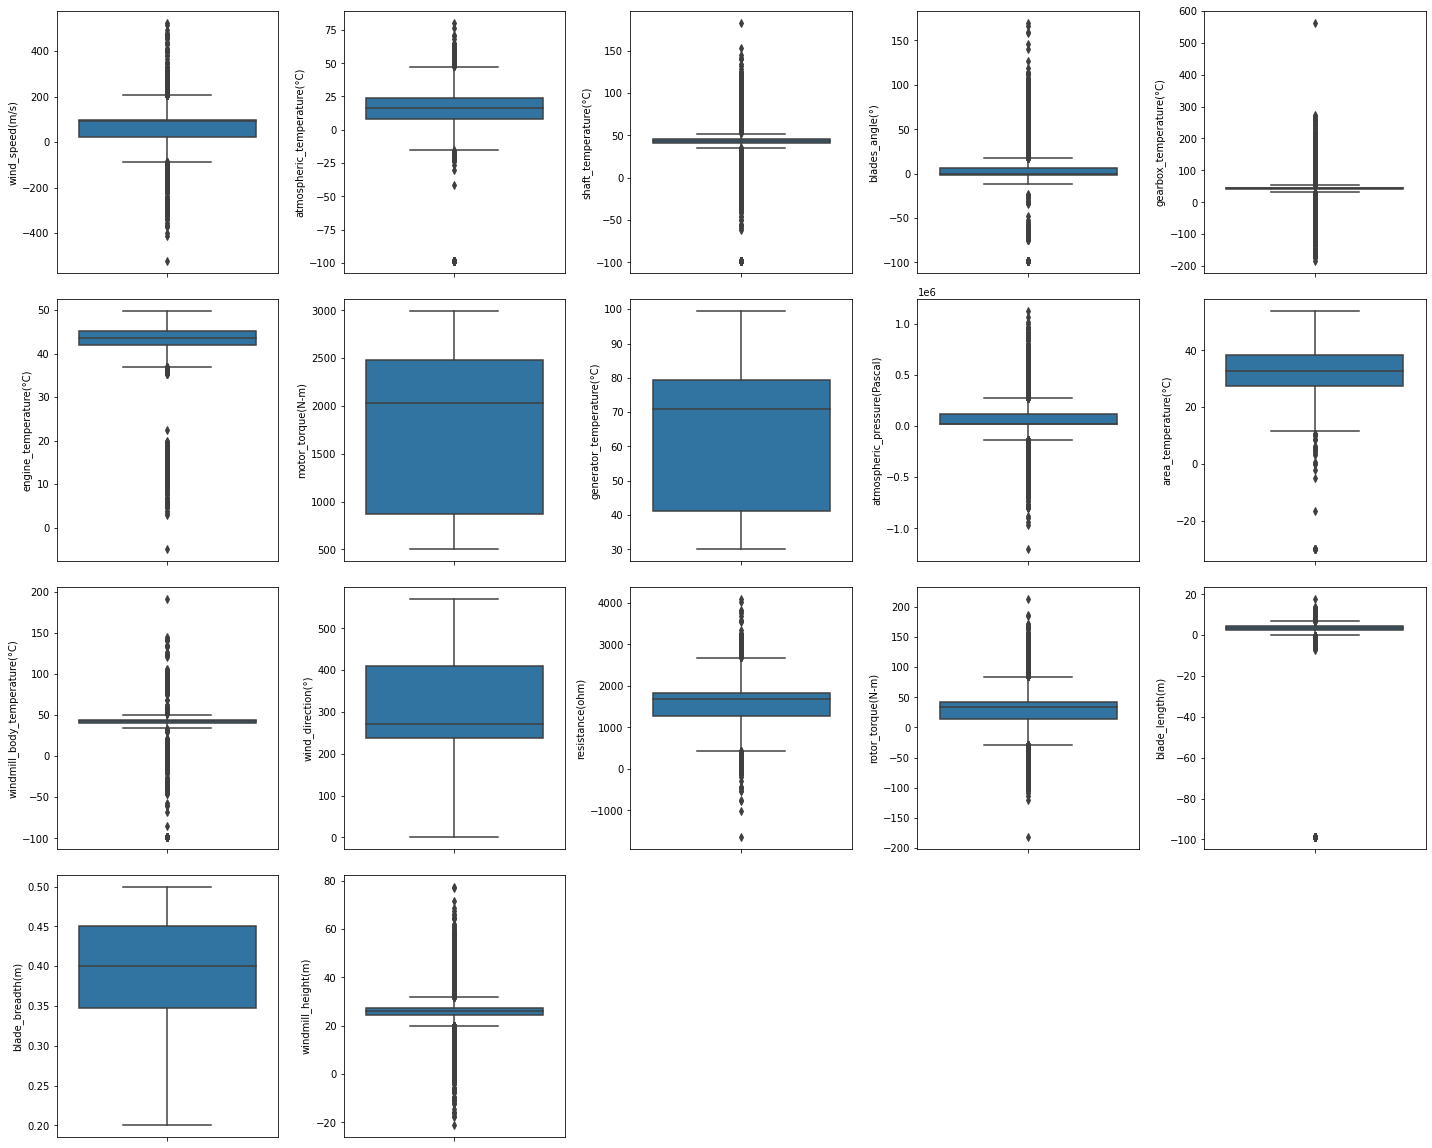

In [18]:
fig = plt.figure(figsize=(20,20))
for i,j in zip(range(len(col)),col):
    fig.add_subplot(5,5,i+1)
    sns.boxplot(y = dtest[j])
plt.tight_layout()
plt.show()

In [8]:
dataset.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,2.820000e+04,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,27993.000000
mean,69.100876,0.478031,40.085776,-9.610964,41.027932,42.615048,1710.557474,65.029918,5.357778e+04,32.735091,20.775915,325.642606,1575.545446,25.872280,2.297967,0.397249,25.882762,6.130529
std,76.256730,44.244576,27.203505,47.935749,43.662841,6.123619,827.264130,19.815888,1.881309e+05,7.703391,54.293566,144.524362,483.324014,32.381497,11.104382,0.061158,7.787861,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883851,7.994556,41.633671,-1.197528,40.557993,41.911627,870.340239,41.199098,1.679418e+04,27.311644,40.450681,241.896476,1268.088233,13.724129,2.551620,0.347445,24.447170,4.059505
50%,93.303251,16.186386,43.686323,-0.489143,43.221767,43.525715,2031.686821,70.729533,1.819398e+04,32.605195,42.777495,279.988089,1678.231923,32.985891,3.464017,0.398591,25.957808,5.764710
75%,95.267425,23.757197,45.673935,5.521496,45.879874,45.174513,2462.465292,78.947537,1.180943e+05,38.232387,44.495744,487.935807,1829.044723,41.560156,4.366074,0.449354,27.480730,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [10]:
dataset.tail()

,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
28195,23-09-2019 05:43,92.863124,19.416690,44.245545,-99.000000,44.115468,41.862811,2060.608278,71.243048,-238421.83980,...,42.149437,264.946215,1687.797906,34.954423,A,Medium,9.763809,0.419295,26.742207,3.612339
28196,23-09-2019 06:03,148.317789,13.585624,44.052100,1.915290,72.561955,43.488327,758.588890,38.926461,114468.53110,...,42.682014,261.001240,1179.610714,11.325755,D,Medium,2.308167,0.333567,27.198580,3.261231
28197,23-09-2019 06:13,10.439927,13.585624,45.024552,1.877887,40.372001,42.112191,789.952969,38.525955,115463.73020,...,-99.000000,255.260356,1176.015821,-99.000000,B2,Low,2.034609,0.301104,24.669846,3.331839
28198,23-09-2019 06:23,92.770284,16.567249,-99.000000,1.624727,-8.225493,42.405931,2094.082691,70.494198,-306066.51130,...,84.225094,293.087925,1683.255483,-99.000000,A,Medium,-1.836604,0.343995,17.818620,3.284468
28199,23-09-2019 06:33,91.849162,23.611799,42.681538,1.518618,-14.816641,45.181143,2097.591288,71.760141,17204.12547,...,41.034078,286.857212,1685.774543,95.016006,BD,Medium,2.185128,0.418773,25.995751,3.475205


In [11]:
dataset["turbine_status"] = dataset["turbine_status"].astype("category")
dataset["cloud_level"] = dataset["cloud_level"].astype("category")

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   datetime                        28200 non-null  object  
 1   wind_speed(m/s)                 28200 non-null  float64 
 2   atmospheric_temperature(°C)     28200 non-null  float64 
 3   shaft_temperature(°C)           28200 non-null  float64 
 4   blades_angle(°)                 28200 non-null  float64 
 5   gearbox_temperature(°C)         28200 non-null  float64 
 6   engine_temperature(°C)          28200 non-null  float64 
 7   motor_torque(N-m)               28200 non-null  float64 
 8   generator_temperature(°C)       28200 non-null  float64 
 9   atmospheric_pressure(Pascal)    28200 non-null  float64 
 10  area_temperature(°C)            28200 non-null  float64 
 11  windmill_body_temperature(°C)   28200 non-null  float64 
 12  wind_direction(°) 

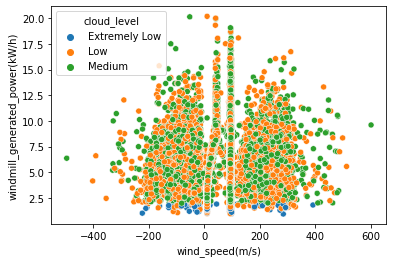

In [14]:
import seaborn as sns

sns.scatterplot(x="wind_speed(m/s)", y="windmill_generated_power(kW/h)", hue="cloud_level",data=dataset)

# Data is scattered hence we use multiple Decission tree algorithm gives the better result it doesnot require feature scaling 

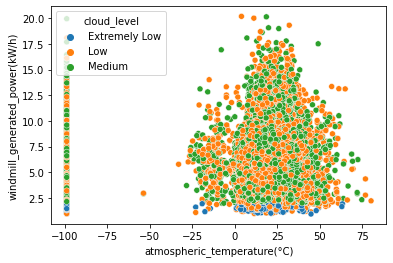

In [16]:
import seaborn as sns

sns.scatterplot(x="atmospheric_temperature(°C)", y="windmill_generated_power(kW/h)", hue="cloud_level",data=dataset)

In [22]:
dffin=dataset.drop(["turbine_status","cloud_level"],axis=1)

# Modelling

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')



In [23]:
colfin=list(dffin.columns)


In [24]:
colfin[1:-1]
target

['windmill_generated_power(kW/h)']

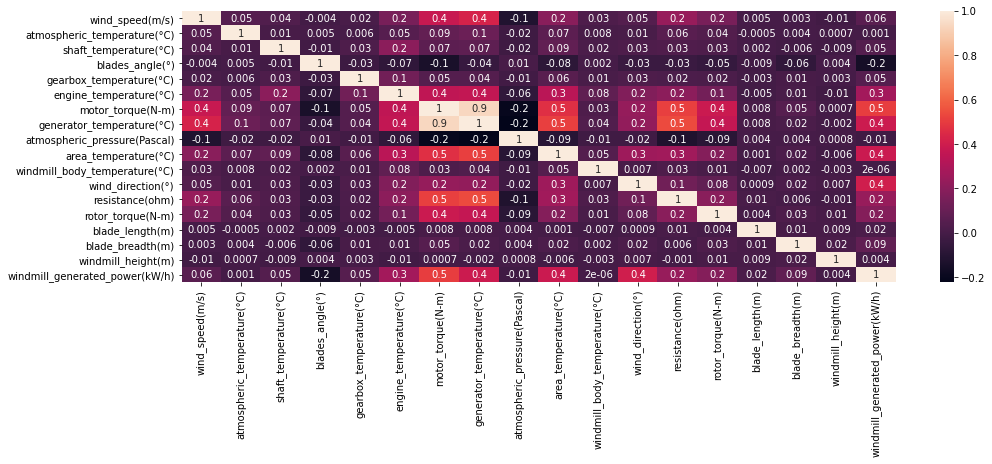

In [30]:

fig, ax = plt.subplots(figsize = (16,5))

ax=sns.heatmap(dffin.corr(), annot = True,fmt='.1g')



# generator temperature and motor torque  have high correlation hence only one is considered 
# No other  features have high correlation hence we consider all other features for Modelling

In [31]:
dffin=dffin.drop(["motor_torque(N-m)"],axis=1)

In [40]:
dffin.fillna(dffin.median(), inplace=True)


# modelling

In [55]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total,model

## Training the Multiple Linear Regression model on the Training set

In [46]:
def Definedata():
    # define dataset
   # colfin.remove("motor_torque(N-m)")
    x_median = dffin[colfin[1:-1]]

    y_median = dffin[target]
    
   
    return x_median, y_median

## Predicting the Test set results

In [34]:
def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = len(dffin['wind_speed(m/s)'])
    aa=[x for x in dffin['wind_speed(m/s)']]
    plt.figure(figsize=(25,10)) 
    plt.semilogy(aa, y[:number], 'o', label='Real Power')
    plt.semilogy(aa, y_total[:number], 'x', label='Predicted Power')
    
    plt.xlabel('wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.show()

In [35]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [56]:
y_predicted,Model = Models(DecisionTreeRegressor())


		Error Table
Mean Absolute Error      :  0.5147205788476251
Mean Squared  Error      :  0.9532623377798847
Root Mean Squared  Error :  0.9763515441580889
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.8692469764909024


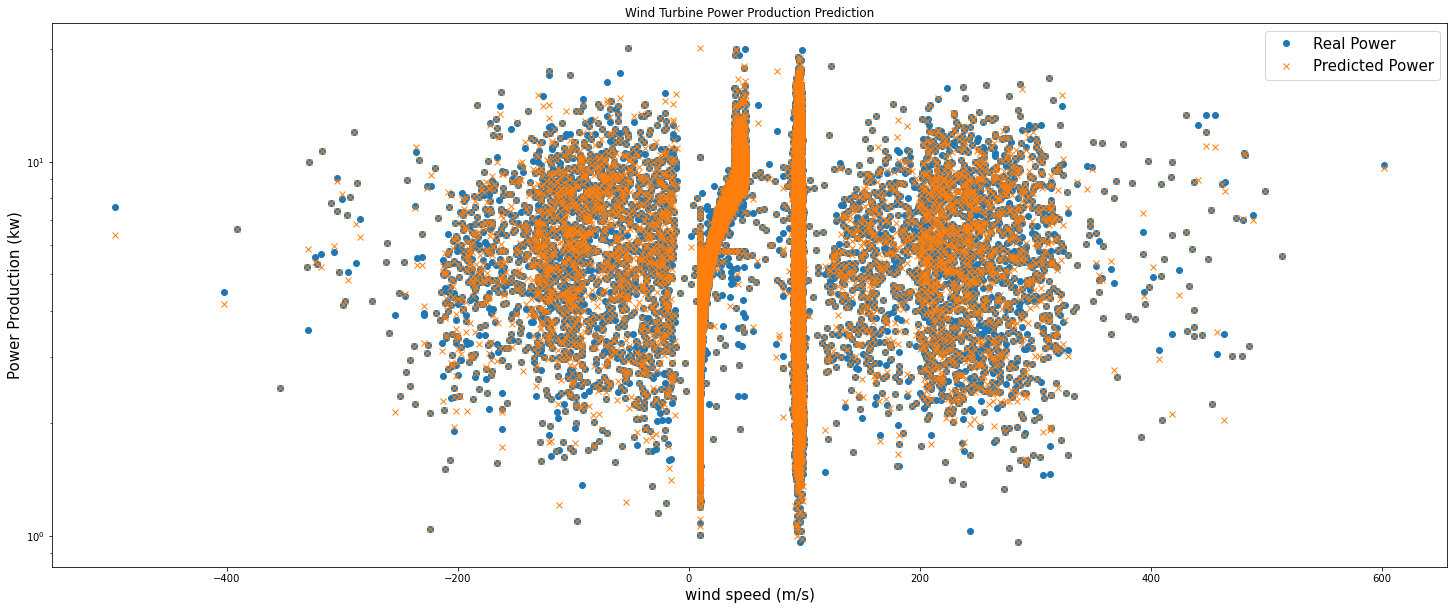

In [57]:
y_actual=dffin[target]
Graph_prediction(y_predicted,y_actual)


		Error Table
Mean Absolute Error      :  0.42256827055343915
Mean Squared  Error      :  0.47977025693431835
Root Mean Squared  Error :  0.6926545004071787
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.934192919202076


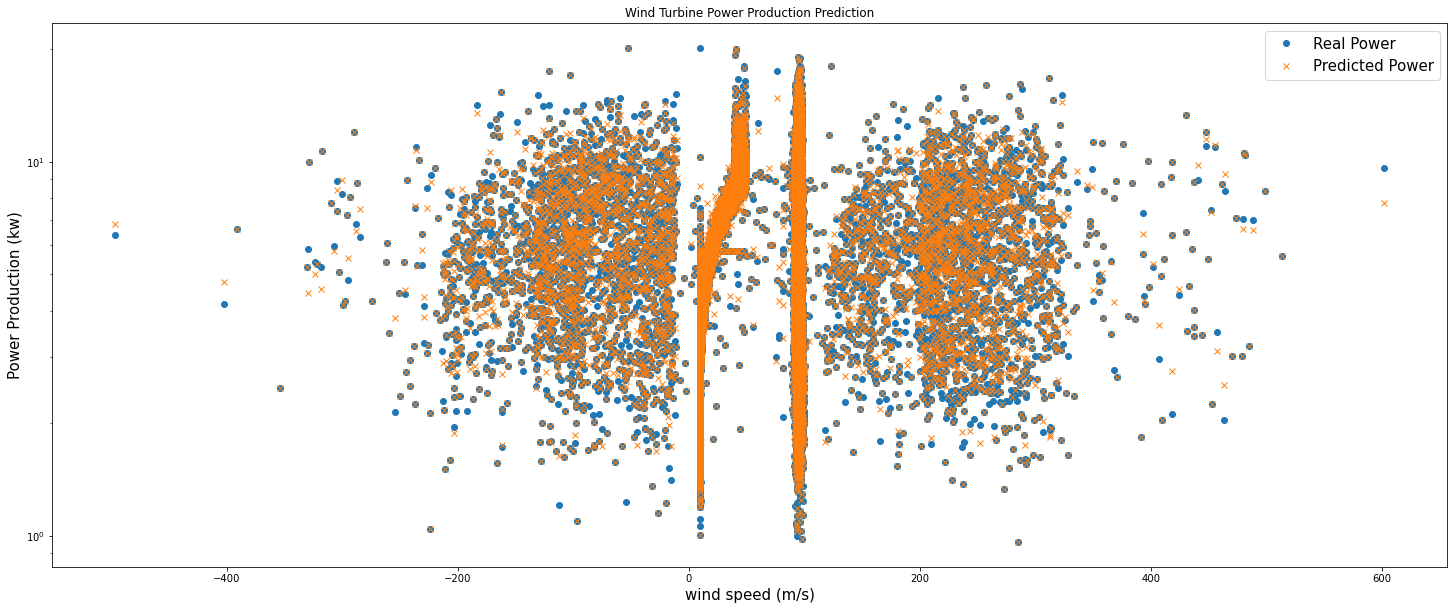

In [58]:
y_predicted, Model = Models(ExtraTreesRegressor())
Graph_prediction(y_actual, y_predicted)

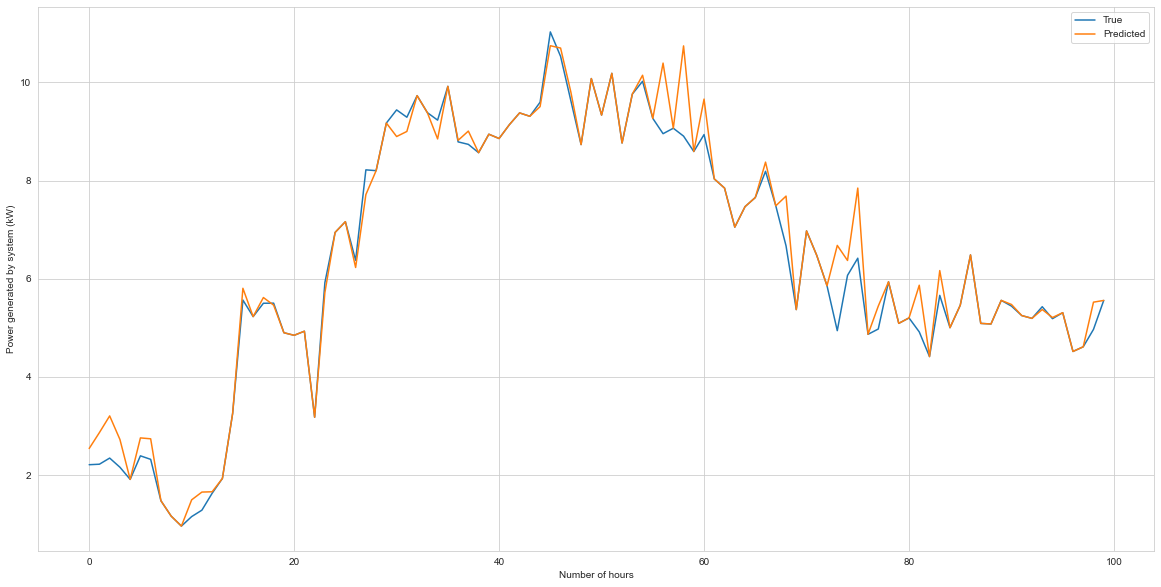

In [59]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  0.38045381284565893
Mean Squared  Error      :  0.44440930047600946
Root Mean Squared  Error :  0.6666403081692627
Accuracy on Traing set   :  0.9917015040287449
Accuracy on Testing set  :  0.9390431600936501


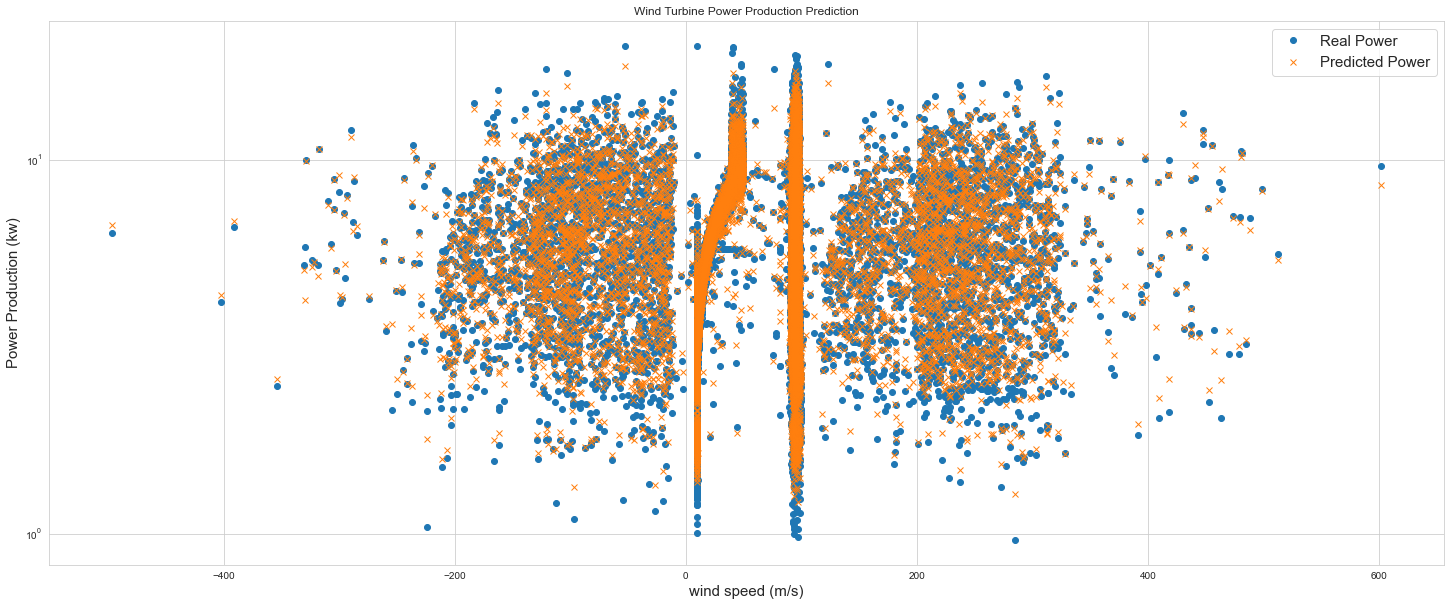

In [62]:
y_actual=dffin[target]
y_predicted, model = Models(RandomForestRegressor(n_estimators=350,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  0.38798661916461036
Mean Squared  Error      :  0.4387344547100547
Root Mean Squared  Error :  0.6623703304874508
Accuracy on Traing set   :  0.9815216306575462
Accuracy on Testing set  :  0.939821543139365


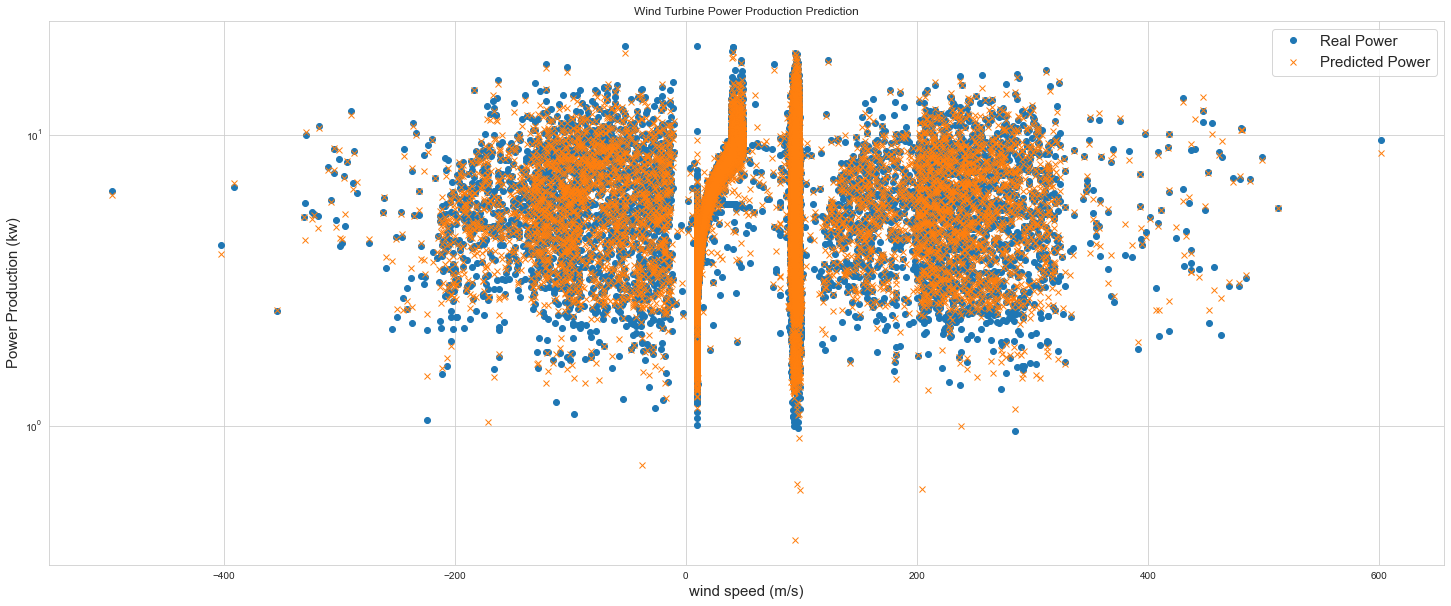

In [63]:
y_predicted,model = Models(GradientBoostingRegressor(random_state=21, n_estimators=2000))
Graph_prediction(y_actual, y_predicted)

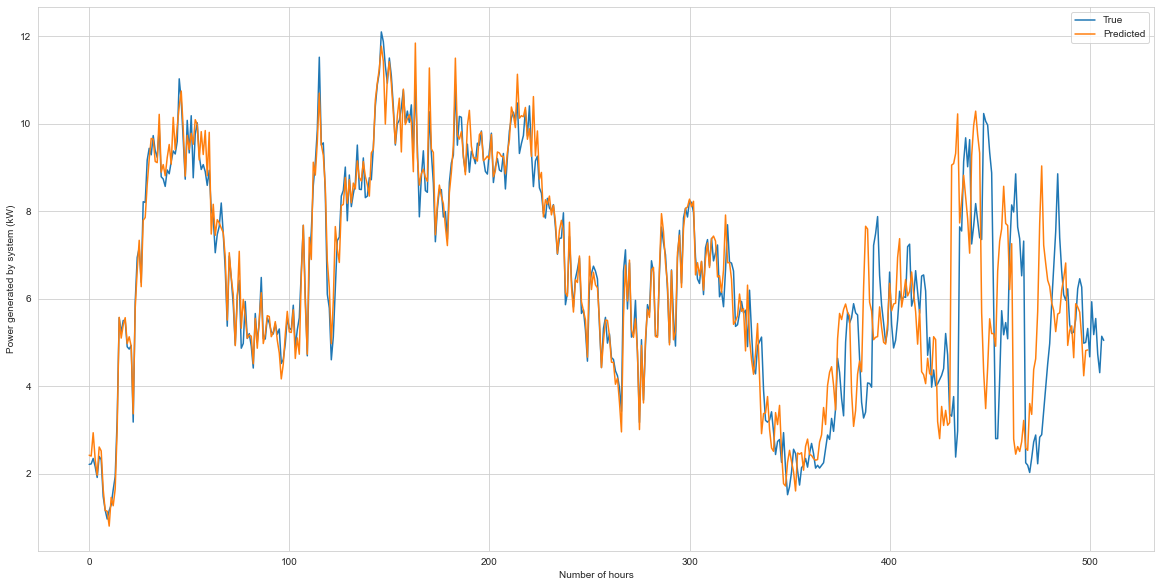

In [215]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:500], label="True")
plt.plot(y_predicted[0:500], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.show()

# Among many regressor models the Fianl model choosen for prediction is choosen to be GradientBoostingRegressor as it has the highest accuracy of 95.85 % in predicting the powers

In [128]:
dtest = pd.read_csv("D:/windturbins_dataset/test.csv")

dtest['datetime'].astype('datetime64[ms]')
dtest.drop(columns = ["turbine_status","cloud_level","tracking_id","datetime","motor_torque(N-m)"], inplace = True) #We drop WTG because every value was the same

target = ['windmill_generated_power(kW/h)']

for n in col:
        dtest.fillna(dffin.median(), inplace=True)

       

In [129]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wind_speed(m/s)                12086 non-null  float64
 1   atmospheric_temperature(°C)    12086 non-null  float64
 2   shaft_temperature(°C)          12086 non-null  float64
 3   blades_angle(°)                12086 non-null  float64
 4   gearbox_temperature(°C)        12086 non-null  float64
 5   engine_temperature(°C)         12086 non-null  float64
 6   generator_temperature(°C)      12086 non-null  float64
 7   atmospheric_pressure(Pascal)   12086 non-null  float64
 8   area_temperature(°C)           12086 non-null  float64
 9   windmill_body_temperature(°C)  12086 non-null  float64
 10  wind_direction(°)              12086 non-null  float64
 11  resistance(ohm)                12086 non-null  float64
 12  rotor_torque(N-m)              12086 non-null 

In [130]:
predictions = model.predict(dtest)
predictions

array([2.54561923, 2.57121386, 3.1465519 , ..., 5.13742442, 5.23785231,
       9.65234486])

In [131]:
target

['windmill_generated_power(kW/h)']

In [132]:
ypre=np.asarray(predictions)
yf=ypre.reshape(12086,1)
dtest[target]=yf

In [133]:
dtest.to_csv('submission1.csv')

In [135]:
dtest = pd.read_csv("D:/windturbins_dataset/test.csv")

dtest=dtest[["tracking_id","datetime"]]

In [136]:
dtest[target]=yf

In [137]:
dtest.to_csv('submissionFinal.csv',index=False)